# 7. Betting Analysis

In this notebook, we're going to analyse the results of our betting simulator built in the last stage.
This will be useful to extract meaningful insights from the profits achieved.
We'll be able to find which matches give us the most benefit.

In order to make a realistic analysis, we'll use the bookmakers average odds per player

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
betting_df = pd.read_csv("csv/Betting_Data.csv")

We need to change the Date column data type to Date:

In [3]:
betting_df['Date'] = pd.to_datetime(betting_df['Date'])

In [4]:
def create_betting_history(betting_df, initial_bankroll, stake, value_threshold=0):
    
    history_df = betting_df[(betting_df["Bet on Pl0 Value"]>value_threshold) | (betting_df["Bet on Pl1 Value"]>value_threshold)].copy()
    
    bankroll = initial_bankroll
    won_bets = 0
    lost_bets = 0
    total_bets = 0
    for ix, row in betting_df.iterrows():
        if bankroll < 0: break
        
        value_on_p0 = row['Bet on Pl0 Value']
        value_on_p1 = row['Bet on Pl1 Value']
        winner = row["Winner"]
                    
        real_odds_p0 = row['Pl0 Avg odds']
        real_odds_p1 = row['Pl1 Avg odds'] 
        
        if pd.isna(real_odds_p0) or pd.isna(real_odds_p1): continue
        
        if value_on_p0 > value_threshold:
            history_df.loc[total_bets, 'Bet on Player:'] = 0
            history_df.loc[total_bets, 'Stake'] = stake
            history_df.loc[total_bets, 'Odds'] = real_odds_p0
            if winner == 0:
                bankroll += (real_odds_p0 - 1) * stake
                won_bets += 1
                history_df.loc[total_bets, 'Won'] = "YES"
                history_df.loc[total_bets, 'Profit'] = (real_odds_p0 - 1) * stake
            else:
                bankroll -= stake
                lost_bets += 1
                history_df.loc[total_bets, 'Won'] = "NO"
                history_df.loc[total_bets, 'Profit'] = stake * -1
            total_bets += 1
        
        if value_on_p1 > value_threshold:
            history_df.loc[total_bets, 'Bet on Player:'] = 1
            history_df.loc[total_bets, 'Stake'] = stake
            history_df.loc[total_bets, 'Odds'] = real_odds_p1
            if winner == 1:
                bankroll += (real_odds_p1 - 1) * stake
                won_bets += 1
                history_df.loc[total_bets, 'Won'] = "YES"
                history_df.loc[total_bets, 'Profit'] = (real_odds_p1 - 1) * stake
            else:
                bankroll -= stake
                lost_bets += 1
                history_df.loc[total_bets, 'Won'] = "NO"
                history_df.loc[total_bets, 'Profit'] = stake * -1
            total_bets += 1
    
    profit = round(bankroll - initial_bankroll,2)
    investment = total_bets*stake
    roi = round(100 * profit / investment, 2)
    print("Total bets placed: {}\nBets won: {}, bets lost: {}\nProfit: {}\nMoney invested: {}\nROI: {}%"
           .format(total_bets, won_bets, lost_bets, profit, investment, roi))
    
    return (history_df, roi)

Let's analyse the ROI differences year by year from 2010 to 2019.

In [5]:
"""
This function takes a betting dataframe in input, with a year parameter that's used to filter all matches in the dataframe
played in that year. If a second year is specified (year_end attribute), then the matches returned will be between the first
year parameter and the second year parameter included
"""
def bets_for_year(df, year, year_end=None):
    if year_end is not None:
        return df[(df['Date'] > pd.Timestamp(year-1,12,31)) & ((df['Date'] < pd.Timestamp(year_end,12,31)))].copy()
    else: return df[(df['Date'] > pd.Timestamp(year-1,12,31)) & ((df['Date'] < pd.Timestamp(year,12,31)))].copy()

+++++++++
Year 2010
Total bets placed: 1298
Bets won: 721, bets lost: 577
Profit: 135.02
Money invested: 1298
ROI: 10.4%
+++++++++
+++++++++
Year 2011
Total bets placed: 2012
Bets won: 1083, bets lost: 929
Profit: 132.55
Money invested: 2012
ROI: 6.59%
+++++++++
+++++++++
Year 2012
Total bets placed: 2031
Bets won: 1044, bets lost: 987
Profit: 152.48
Money invested: 2031
ROI: 7.51%
+++++++++
+++++++++
Year 2013
Total bets placed: 2018
Bets won: 1035, bets lost: 983
Profit: 157.76
Money invested: 2018
ROI: 7.82%
+++++++++
+++++++++
Year 2014
Total bets placed: 1934
Bets won: 1097, bets lost: 837
Profit: 265.47
Money invested: 1934
ROI: 13.73%
+++++++++
+++++++++
Year 2015
Total bets placed: 2036
Bets won: 1093, bets lost: 943
Profit: 163.52
Money invested: 2036
ROI: 8.03%
+++++++++
+++++++++
Year 2016
Total bets placed: 2028
Bets won: 1095, bets lost: 933
Profit: 336.38
Money invested: 2028
ROI: 16.59%
+++++++++
+++++++++
Year 2017
Total bets placed: 2079
Bets won: 1208, bets lost: 871


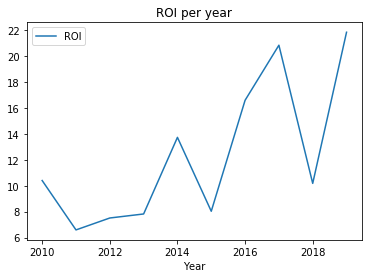

In [6]:
years_result_df_list = []
for y in range(2010,2020):
    print("+++++++++")
    print("Year {}".format(y))
    result = create_betting_history(bets_for_year(betting_df,y), 1000, 1)
    years_result_df_list.append({"Year":y, "ROI": result[1]})
    print("+++++++++")
result_df = pd.DataFrame(years_result_df_list)
result_df.plot.line(x='Year', y='ROI', title="ROI per year")

Now let's analyse all the period from 2010 to 2019

In [7]:
result = create_betting_history(bets_for_year(betting_df,2010,2019), 1000, 1)
df_2010_2019 = result[0] 
roi_2010_2019 = result[1]

Total bets placed: 19762
Bets won: 10929, bets lost: 8833
Profit: 2464.98
Money invested: 19762
ROI: 12.47%


In [8]:
#calculating ROI from dataframe
df_2010_2019['Profit'].sum()/df_2010_2019.shape[0]

0.12473332658637787

In [9]:
#total matches
df_2010_2019.shape[0]

19762

## ROI by Surface

Since no matches have been played on carpet in surface in these last years, we'll now represents only Hard, Clay and Grass surfaces

In [10]:
df_hard = df_2010_2019[df_2010_2019['Hard'] == 1].copy()
roi_hard = round(100*df_hard['Profit'].sum()/df_hard.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_hard,df_hard.shape[0]))

ROI: 11.3%, Matches: 11007


In [11]:
df_clay = df_2010_2019[df_2010_2019['Clay'] == 1].copy()
roi_clay = round(100*df_clay['Profit'].sum()/df_clay.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_clay,df_clay.shape[0]))

ROI: 10.12%, Matches: 6312


In [12]:
df_grass = df_2010_2019[df_2010_2019['Grass'] == 1].copy()
roi_grass = round(100*df_grass['Profit'].sum()/df_grass.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_grass,df_grass.shape[0]))

ROI: 23.71%, Matches: 2440


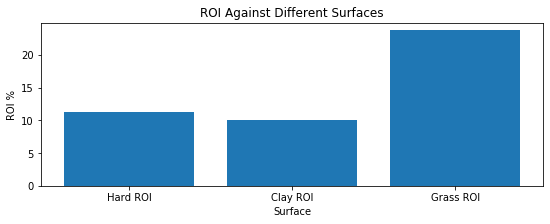

In [13]:
names = ['Hard ROI','Clay ROI','Grass ROI']
values = [roi_hard, roi_clay, roi_grass]

plt.figure(figsize=(9, 3))

plt.bar(names, values)
plt.xlabel("Surface")
plt.ylabel("ROI %")
plt.title("ROI Against Different Surfaces")
plt.show()

On Hard surface, we get a 11.3% ROI on a total of 11007 matches, above half of the matches in our betting dataset.
On Clay the ROI drops to 10.12% on a total of 6312 matches.
On grass, the ROI reaches an astonishing 23.71%! The matches are less (2440), since the grass season usually is very short.

## ROI by Tournament

Next, we'll explore which categories provide us with the highest margin

In [14]:
df_atp250 = df_2010_2019[df_2010_2019['ATP250'] == 1].copy()
roi_atp250 = round(100*df_atp250['Profit'].sum()/df_atp250.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_atp250,df_atp250.shape[0]))

ROI: 16.18%, Matches: 8637


In [15]:
df_atp500 = df_2010_2019[df_2010_2019['ATP500'] == 1].copy()
roi_atp500 = round(100*df_atp500['Profit'].sum()/df_atp500.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_atp500,df_atp500.shape[0]))

ROI: 13.99%, Matches: 3116


In [16]:
df_atp1000 = df_2010_2019[df_2010_2019['Masters 1000'] == 1].copy()
roi_atp1000 = round(100*df_atp1000['Profit'].sum()/df_atp1000.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_atp1000,df_atp1000.shape[0]))

ROI: 10.03%, Matches: 4075


In [17]:
df_masters = df_2010_2019[df_2010_2019['Masters Cup'] == 1].copy()
roi_masters = round(100*df_masters['Profit'].sum()/df_masters.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_masters,df_masters.shape[0]))

ROI: -2.82%, Matches: 111


In [18]:
df_slam = df_2010_2019[df_2010_2019['Grand Slam'] == 1].copy()
roi_slam = round(100*df_slam['Profit'].sum()/df_slam.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_slam,df_slam.shape[0]))

ROI: 5.8%, Matches: 3820


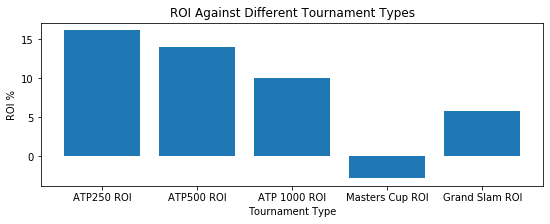

In [19]:
names = ['ATP250 ROI','ATP500 ROI','ATP 1000 ROI', 'Masters Cup ROI', 'Grand Slam ROI']
values = [roi_atp250, roi_atp500, roi_atp1000, roi_masters, roi_slam]

plt.figure(figsize=(9, 3))

plt.bar(names, values)
plt.xlabel("Tournament Type")
plt.ylabel("ROI %")
plt.title("ROI Against Different Tournament Types")
plt.show()

Before analysing the difference in terms of ROI (negative for the Masters Cup!), we need to specify that the number of matches for Masters Cup is significantly lower than the other tournament types matches (111 against 3000/4000/8000 for other categories).
However we note how smaller the ROI is for Grand Slam matches.

GS matches are best of 5 games, against the traditional best of 3 games we see in the other tournaments, so that might be one cause.
Another cause, as we'll discuss later, might be the liquidity for GS matches, that might make the relative markets much more efficient (wisdom of the crowd effect)

## ROI by Round of Tournament

Next, we'll explore which round in a tournament provide us with the highest margin

In [20]:
df_rr = df_2010_2019[df_2010_2019['Round Robin'] == 1].copy()
roi_rr = round(100*df_rr['Profit'].sum()/df_rr.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_rr,df_rr.shape[0]))

ROI: 3.43%, Matches: 89


In [21]:
df_1st_round = df_2010_2019[df_2010_2019['1st Round'] == 1].copy()
roi_1st_round = round(100*df_1st_round['Profit'].sum()/df_1st_round.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_1st_round,df_1st_round.shape[0]))

ROI: 15.46%, Matches: 9149


In [22]:
df_2nd_round = df_2010_2019[df_2010_2019['2nd Round'] == 1].copy()
roi_2nd_round = round(100*df_2nd_round['Profit'].sum()/df_2nd_round.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_2nd_round,df_2nd_round.shape[0]))

ROI: 13.16%, Matches: 5491


In [23]:
df_3rd_round = df_2010_2019[df_2010_2019['3rd Round'] == 1].copy()
roi_3rd_round = round(100*df_3rd_round['Profit'].sum()/df_3rd_round.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_3rd_round,df_3rd_round.shape[0]))

ROI: 5.14%, Matches: 1350


In [24]:
df_4th_round = df_2010_2019[df_2010_2019['4th Round'] == 1].copy()
roi_4th_round = round(100*df_4th_round['Profit'].sum()/df_4th_round.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_4th_round,df_4th_round.shape[0]))

ROI: -10.71%, Matches: 348


In [25]:
df_qf = df_2010_2019[df_2010_2019['Quarterfinals'] == 1].copy()
roi_qf = round(100*df_qf['Profit'].sum()/df_qf.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_qf,df_qf.shape[0]))

ROI: 7.84%, Matches: 1877


In [26]:
df_sm = df_2010_2019[df_2010_2019['Semifinals'] == 1].copy()
roi_sf = round(100*df_sm['Profit'].sum()/df_sm.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_sf,df_sm.shape[0]))

ROI: 10.99%, Matches: 963


In [27]:
df_final = df_2010_2019[df_2010_2019['The Final'] == 1].copy()
roi_final = round(100*df_final['Profit'].sum()/df_final.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_final,df_final.shape[0]))

ROI: 7.34%, Matches: 492


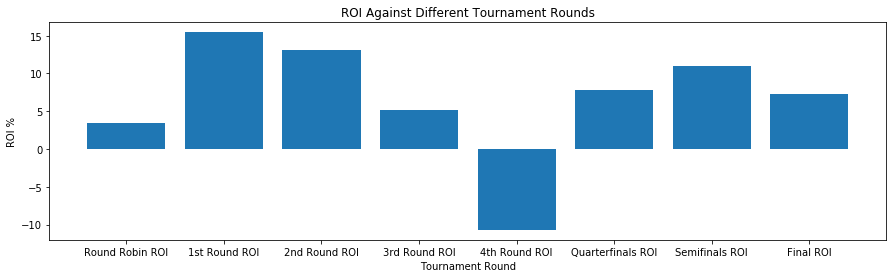

In [28]:
names = ['Round Robin ROI','1st Round ROI','2nd Round ROI', '3rd Round ROI', '4th Round ROI', 'Quarterfinals ROI', 'Semifinals ROI', 'Final ROI']
values = [roi_rr, roi_1st_round, roi_2nd_round, roi_3rd_round, roi_4th_round, roi_qf, roi_sf, roi_final]

plt.figure(figsize=(15, 4))

plt.bar(names, values)
plt.xlabel("Tournament Round")
plt.ylabel("ROI %")
plt.title("ROI Against Different Tournament Rounds")
plt.show()

This graph shows us how the ROI is much smaller for 4th rounds and round robins, but again, we need to look at the number of observations for these matches.

Round Robins usually take place only in the Masters Cup tournament, once per year, and therefore we have only 89 matches in the dataframe. Thus the result is not statistically significant.

We also need to know that 4th matches are played only in Grand Slam tournaments (slams have higher number of rounds) since, for other tournaments (with less rounds), the 4th round would be a quarterfinal or a semifinal. Therefore, although the ROI is well below breakeven (-10.71%), the limited amount of matches (348) don't give us the confidence to believe blindly at this result.

## ROI by Ranking Index

Next, we'll analyse how the ranking index (difference between the rankings of Player 0 and Player 1) affects the ROI

In [29]:
df_very_high_ri_diff = df_2010_2019[abs(df_2010_2019['Rank Index']) > 0.5].copy()
roi_very_high_ri_diff = round(100*df_very_high_ri_diff['Profit'].sum()/df_very_high_ri_diff.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_very_high_ri_diff,df_very_high_ri_diff.shape[0]))

ROI: 10.3%, Matches: 5098


In [30]:
df_medium_ri_diff = df_2010_2019[(abs(df_2010_2019['Rank Index']) > 0.1) & (abs(df_2010_2019['Rank Index']) <= 0.5)].copy()
roi_medium_ri_diff = round(100*df_medium_ri_diff['Profit'].sum()/df_medium_ri_diff.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_medium_ri_diff,df_medium_ri_diff.shape[0]))

ROI: 12.32%, Matches: 8627


In [31]:
df_low_ri_diff = df_2010_2019[abs(df_2010_2019['Rank Index']) <= 0.1].copy()
roi_low_ri_diff = round(100*df_low_ri_diff['Profit'].sum()/df_low_ri_diff.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_low_ri_diff,df_low_ri_diff.shape[0]))

ROI: 14.47%, Matches: 6034


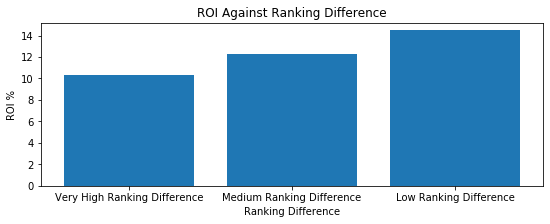

In [32]:
names = ['Very High Ranking Difference','Medium Ranking Difference','Low Ranking Difference']
values = [roi_very_high_ri_diff, roi_medium_ri_diff, roi_low_ri_diff]

plt.figure(figsize=(9, 3))

plt.bar(names, values)
plt.xlabel("Ranking Difference")
plt.ylabel("ROI %")
plt.title("ROI Against Ranking Difference")
plt.show()

Given the Ranking index, for each match, we can notice that the matches where the gap between the rankings of the players is smaller are the ones who give us more profit, while the matches of top players vs low ranked players are not as profitable.
However, the ROI difference between the 3 groups is not huge.

## ROI by Absolute Ranking 

Next, we'll analyse how the rankings (Pl0_Rank and Pl1_Rank) affect the ROI

In [33]:
df_top5 = df_2010_2019[(df_2010_2019['Pl0_Rank'] <= 5) & (df_2010_2019['Pl1_Rank'] <= 5)].copy()
roi_top5 = round(100*df_top5['Profit'].sum()/df_top5.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_top5,df_top5.shape[0]))

ROI: -3.27%, Matches: 176


In [34]:
df_top10 = df_2010_2019[(df_2010_2019['Pl0_Rank'] <= 10) & (df_2010_2019['Pl1_Rank'] <= 10)].copy()
roi_top10 = round(100*df_top10['Profit'].sum()/df_top10.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_top10,df_top10.shape[0]))

ROI: -11.95%, Matches: 512


In [35]:
df_others = df_2010_2019[(df_2010_2019['Pl0_Rank'] > 25) & (df_2010_2019['Pl1_Rank'] > 25)].copy()
roi_others = round(100*df_others['Profit'].sum()/df_others.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_others,df_others.shape[0]))

ROI: 16.05%, Matches: 11459


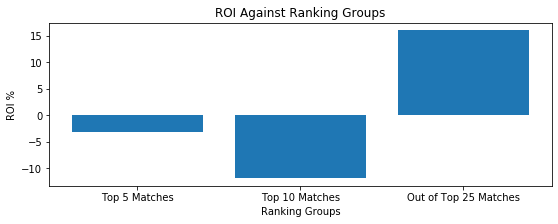

In [36]:
names = ['Top 5 Matches','Top 10 Matches','Out of Top 25 Matches']
values = [roi_top5, roi_top10, roi_others]

plt.figure(figsize=(9, 3))

plt.bar(names, values)
plt.xlabel("Ranking Groups")
plt.ylabel("ROI %")
plt.title("ROI Against Ranking Groups")
plt.show()

Looking at the last analysis, that grouped matches between the top 5 ranked players, the top 10 and the other players outside top 25, we can clearly see a pattern.

In fact, the matches with the best players are not profitable to bet on (at average odds).
If we take another look at the ROI by tournament category we'll also see that Grand Slam and Masters cup matches are not particularly profitable as well.

Why is that? One reason I can think of is that these matches have a high liquidity, since many punters will bet upon these, and thus the market becomes much more efficient than regular matches between lower ranked players, or matches in not-so-important tournaments.
As a proof, let's create two other dataframes. One containing matches between players in the top 10, being semifinals or finals and in tournaments like ATP Master 1000, Grand Slam or Masters Cup.
The other will contain ordinary matches.

We'll then proceed to compare the ROI of these 2 dataframes.

In [37]:
df_top = df_2010_2019[
    (df_2010_2019['The Final']+df_2010_2019['Semifinals']==1) 
    & (df_2010_2019['Grand Slam']+df_2010_2019['Masters Cup']+df_2010_2019['Masters 1000']==1)
].copy()
roi_top = round(100*df_top['Profit'].sum()/df_top.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_top,df_top.shape[0]))

ROI: 8.58%, Matches: 307


In [38]:
df_not_top = df_2010_2019[
    (df_2010_2019['The Final']+df_2010_2019['Semifinals']==0) 
    & (df_2010_2019['Grand Slam']+df_2010_2019['Masters Cup']+df_2010_2019['Masters 1000']==0)
].copy()
roi_not_top = round(100*df_not_top['Profit'].sum()/df_not_top.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_not_top,df_not_top.shape[0]))

ROI: 16.2%, Matches: 10605


As clearly shown here there's a big difference in terms of ROI between the 2 dataframes, but we also need to consider that the "top" matches were only 307, which makes this analysis not so much significant from a statistical standpoint.

## Accuracy of Probabilities

Next, we're going to take the fair odds derived by the predicted probabilities of the matches in the dataset and we're going to look if they reflect the frequency of an event occuring (for example we expect to see that events at odds 2 happen half of the time, etc.)
Then, we're going to do the same thing for the average odds (incremented by 5%, to exclude the margin from our calculation)

#### Our model's fair odds:

In [39]:
diff_tot = 0

odd_list = []
odd = 1.2
while odd <= 5:
    odd_list.append(round(odd,2))
    odd += 0.1

for odd in odd_list:
    ones_p1 = betting_df[(betting_df["Fair odds for Pl1"] >= odd-0.05) & (betting_df["Fair odds for Pl1"] <= odd+0.05)]["Winner"].value_counts()[1]
    zeros_p1 = betting_df[(betting_df["Fair odds for Pl1"] >= odd-0.05) & (betting_df["Fair odds for Pl1"] <= odd+0.05)]["Winner"].value_counts()[0]
    
    zeros_p0 = betting_df[(betting_df["Fair odds for Pl0"] >= odd-0.05) & (betting_df["Fair odds for Pl0"] <= odd+0.05)]["Winner"].value_counts()[0]
    ones_p0 = betting_df[(betting_df["Fair odds for Pl0"] >= odd-0.05) & (betting_df["Fair odds for Pl0"] <= odd+0.05)]["Winner"].value_counts()[1]
    

    correct = (ones_p1+zeros_p0)/(ones_p1+zeros_p1+zeros_p0+ones_p0)
    ideal_odds = round(1/correct,2)
    diff = round(abs(ideal_odds-odd),2)
    diff_tot += diff
    print("++++++++++++")
    print("For Odds around {} the ideal odd would have been {}, with a diff of {}".format(odd,ideal_odds,diff))
    print("Total matches: ",ones_p1+zeros_p1+zeros_p0+ones_p0)
    
print("Average distance between predicted odds and ideal odds has been {}".format(round(diff_tot/len(odd_list),2)))

++++++++++++
For Odds around 1.2 the ideal odd would have been 1.21, with a diff of 0.01
Total matches:  3137
++++++++++++
For Odds around 1.3 the ideal odd would have been 1.34, with a diff of 0.04
Total matches:  2948
++++++++++++
For Odds around 1.4 the ideal odd would have been 1.45, with a diff of 0.05
Total matches:  2660
++++++++++++
For Odds around 1.5 the ideal odd would have been 1.53, with a diff of 0.03
Total matches:  2266
++++++++++++
For Odds around 1.6 the ideal odd would have been 1.68, with a diff of 0.08
Total matches:  2118
++++++++++++
For Odds around 1.7 the ideal odd would have been 1.74, with a diff of 0.04
Total matches:  1880
++++++++++++
For Odds around 1.8 the ideal odd would have been 1.84, with a diff of 0.04
Total matches:  1693
++++++++++++
For Odds around 1.9 the ideal odd would have been 1.83, with a diff of 0.07
Total matches:  1473
++++++++++++
For Odds around 2.0 the ideal odd would have been 2.0, with a diff of 0.0
Total matches:  1492
++++++++++++

#### Bookmakers' turn

In [40]:
diff_tot = 0

odd_list = []
odd = 1.2
while odd <= 5:
    odd_list.append(round(odd,2))
    odd += 0.1

for odd in odd_list:
    ones_p1 = betting_df[(betting_df["Pl1 Avg odds"]*1.05 >= odd-0.05) & (betting_df["Pl1 Avg odds"]*1.05 <= odd+0.05)]["Winner"].value_counts()[1]
    zeros_p1 = betting_df[(betting_df["Pl1 Avg odds"]*1.05 >= odd-0.05) & (betting_df["Pl1 Avg odds"]*1.05 <= odd+0.05)]["Winner"].value_counts()[0]
    
    zeros_p0 = betting_df[(betting_df["Pl0 Avg odds"]*1.05 >= odd-0.05) & (betting_df["Pl0 Avg odds"]*1.05 <= odd+0.05)]["Winner"].value_counts()[0]
    ones_p0 = betting_df[(betting_df["Pl0 Avg odds"]*1.05 >= odd-0.05) & (betting_df["Pl0 Avg odds"]*1.05 <= odd+0.05)]["Winner"].value_counts()[1]
    

    correct = (ones_p1+zeros_p0)/(ones_p1+zeros_p1+zeros_p0+ones_p0)
    ideal_odds = round(1/correct,2)
    diff = round(abs(ideal_odds-odd),2)
    diff_tot += diff
    print("++++++++++++")
    print("For Odds around {} the ideal odd would have been {}, with a diff of {}".format(odd,ideal_odds,diff))
    print("Total matches: ",ones_p1+zeros_p1+zeros_p0+ones_p0)
    
print("Average distance between predicted odds and ideal odds has been {}".format(round(diff_tot/len(odd_list),2)))

++++++++++++
For Odds around 1.2 the ideal odd would have been 1.2, with a diff of 0.0
Total matches:  2148
++++++++++++
For Odds around 1.3 the ideal odd would have been 1.27, with a diff of 0.03
Total matches:  2335
++++++++++++
For Odds around 1.4 the ideal odd would have been 1.36, with a diff of 0.04
Total matches:  2961
++++++++++++
For Odds around 1.5 the ideal odd would have been 1.49, with a diff of 0.01
Total matches:  2497
++++++++++++
For Odds around 1.6 the ideal odd would have been 1.63, with a diff of 0.03
Total matches:  2519
++++++++++++
For Odds around 1.7 the ideal odd would have been 1.72, with a diff of 0.02
Total matches:  2202
++++++++++++
For Odds around 1.8 the ideal odd would have been 1.86, with a diff of 0.06
Total matches:  1950
++++++++++++
For Odds around 1.9 the ideal odd would have been 1.86, with a diff of 0.04
Total matches:  1368
++++++++++++
For Odds around 2.0 the ideal odd would have been 2.07, with a diff of 0.07
Total matches:  1208
++++++++++++

In general, we see no big difference between our model probabilities picking and the bookmakers. In fact, if we take the average of the differences between ideal odds and real odds (in the case of bookmakers) / predicted odds (in the case of our model), they are very similar (0.34 vs 0.29).

Analyzing deeply, we can see that the probabilities for odds less than 2.2 / 2.4 are very accurate in both cases, and the majority of the big differences happen when we increase the odds.
However, it should be noted that at big odds (thus odds for underdogs), our model generally underestimates the underdog and __increase his odds__ while it should have kept smaller odds for these players.
Interestingly, the opposite happens for the bookmakers odds, who overestimates the underdogs and provide them with __lower odds__ than they should have.